Test 1 - Circular Restricted Three-Body Problem (CR3BP)
--

We start with the simple CR3BP model, where the first body is a solar-mass star, the second body is a Jupiter-mass planet moving in circular orbits with the star, and the third body is a massless test particle launching from an outer orbit. All three bodies are coplanar. Basic Newtonian movement outputs will be checked in this test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from wh5470 import wh5470

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# constants
AU_to_meter = 1.496e+11
yr = 3600*24*365 # yr in s
G = 6.67430e-11  # Gravitational constant [N m^2 / kg^2]
c = 299792458.0  # Speed of light [m/s]
M_sun = 1.989e30 # Solar mass in [kg]
M_Jupiter = 1.898e27 # Jupiter mass in [kg]

Let's set up bodies and their initial positions and velocities, using Cartesian coordinates first.

In [5]:
masses = np.array([M_sun, M_Jupiter, 1e-50])


positions_initial = np.array([[0., 0., 0.], # Sun at origin
                      [5.2*AU_to_meter, 0., 0.], # Jupiter at 5.2 AU from the Sun
                      [10*AU_to_meter, 0., 0.]])  # test particle in an outer orbit

velocities_initial = np.array([[0., 0., 0.], # Sun initially stationary
                       [0., 13060., 0.], # Jupiter's orbital velocity about 13.06 km/s
                       [0., np.sqrt(G*1.989e30/10/AU_to_meter), 0.]]) # test particle Keplerian velocity

dt_ = 5*3600 # timestep
endtime_ = 10 * yr # total integration time

# set up the simulation using Cartesian coordinates
sim_ = wh5470(masses, positions=positions_initial, velocities=velocities_initial, time_step=dt_, total_time=endtime_)


Although Cartesian coordinates may seem more straightforward, using orbital elements is often more practical for implementation. Here we utilize a set of orbital elements:

$a$: semi-major axis, half the distance between the apoapsis and periapsis;

$e$: eccentricity, shape of the ellipse;

$i$: inclination, vertical tilt of the ellipse with respect to the reference plane;

$\Omega$: longitude of ascending node, horizontally orients the ascending node of the ellipse;

$\omega$: argument of periapsis, the orientation of the ellipse in the orbital plane;

$M$: mean anomaly, a mathematically convenient fictitious "angle" which varies linearly with time, but which does not correspond to a real geometric angle.

Now let's set up using orbital elements!

In [6]:
masses = np.array([M_sun, M_Jupiter, 1e-50])

orbital_elements_initial = np.array([(5.2*AU_to_meter, 0., 0.0, 0., 0.0, 0.0),  # Sun-like star
                                     (5.2*AU_to_meter, 0., 0.0, np.pi / 2, np.pi / 3, np.pi / 6),  # Jupiter-like planet, angles are random
                                     (10*AU_to_meter, 0.1, 0.0, np.pi / 3, np.pi / 4, np.pi / 5)])  # massless test particle, angles are random

dt = 20*3600 # timestep
endtime = 50 * yr# * yr # total integration time

# set up the simulation using orbital elements
sim = wh5470(masses, orbital_elements=orbital_elements_initial, time_step=dt, total_time=endtime)


Then start to integrate!

We can record parameters including trajectory, velocity, energy, angular_momentum, orbital_elements, trajectory & velocity in jacobi coordinates, etc from the simulation.

In [7]:
%%time
trajectory, velocity, energy, angular_momentum, orbital_elements, trajectory_jacobi, velocity_jacobi = sim.integrate()

CPU times: user 20.9 s, sys: 118 ms, total: 21 s
Wall time: 21.1 s


Let's see how the trajectories of this planetary system evolve. For simplicity we will look at the trajectories in jacobi coordinates.

In [8]:
# print out the first 5 lines
trajectory_jacobi[0:5]

[array([[ 1.48324226e+09,  1.79419478e+06,  0.00000000e+00],
        [-1.55435662e+12, -1.88021782e+09,  0.00000000e+00],
        [-1.95379806e+12,  7.20600480e+11,  0.00000000e+00]]),
 array([[ 1.48324185e+09,  3.58838923e+06,  0.00000000e+00],
        [-1.55435619e+12, -3.76043529e+09,  0.00000000e+00],
        [-1.95421556e+12,  7.19063593e+11,  0.00000000e+00]]),
 array([[ 1.48324118e+09,  5.38258302e+06,  0.00000000e+00],
        [-1.55435548e+12, -5.64065207e+09,  0.00000000e+00],
        [-1.95463291e+12,  7.17526651e+11,  0.00000000e+00]]),
 array([[ 1.48324023e+09,  7.17677583e+06,  0.00000000e+00],
        [-1.55435448e+12, -7.52086782e+09,  0.00000000e+00],
        [-1.95505012e+12,  7.15989653e+11,  0.00000000e+00]]),
 array([[ 1.48323901e+09,  8.97096733e+06,  0.00000000e+00],
        [-1.55435320e+12, -9.40108220e+09,  0.00000000e+00],
        [-1.95546718e+12,  7.14452600e+11,  0.00000000e+00]])]

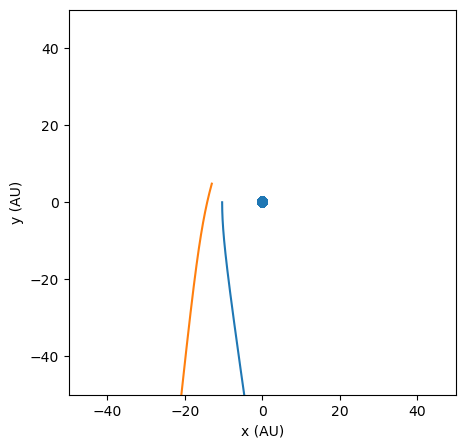

In [9]:
x0 = [trajectory_jacobi[i][0][0] for i in range(len(trajectory_jacobi))]
y0 = [trajectory_jacobi[i][0][1] for i in range(len(trajectory_jacobi))]
x1 = [trajectory_jacobi[i][1][0] for i in range(len(trajectory_jacobi))]
y1 = [trajectory_jacobi[i][1][1] for i in range(len(trajectory_jacobi))]
x2 = [trajectory_jacobi[i][2][0] for i in range(len(trajectory_jacobi))]
y2 = [trajectory_jacobi[i][2][1] for i in range(len(trajectory_jacobi))]

fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(111)
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
ax.set_xlim(-50, 50)
ax.set_ylim([-50, 50])
plt.scatter(np.array(x0)/AU_to_meter, np.array(y0)/AU_to_meter)
plt.plot(np.array(x1)/AU_to_meter, np.array(y1)/AU_to_meter)
plt.plot(np.array(x2)/AU_to_meter, np.array(y2)/AU_to_meter)
plt.show()


Now let's use the `plot_energy_and_momentum` function to verify if energy and momentum are conserved in this CR3BP.

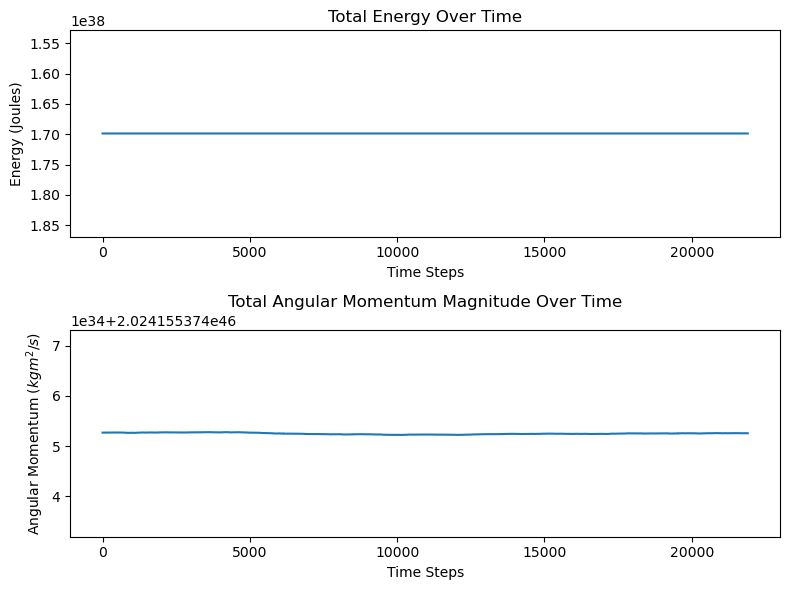

In [10]:
sim.plot_energy_and_momentum(energy, angular_momentum)

At last, we'll change the mass of the outer particle and see if our close encounter cutoff works. Note that Wisdom-Holman integrators only work well for further orbits, and we automatically pause the integration when there is a hill radius encounter.

In [11]:
masses = np.array([M_sun, M_Jupiter, 1e-3*M_Jupiter])

orbital_elements_initial = np.array([(5.2*AU_to_meter, 0., 0.0, 0., 0.0, 0.0),  # Sun-like star
                                     (5.2*AU_to_meter, 0., 0.0, np.pi / 2, np.pi / 3, np.pi / 6),  # Jupiter-like planet, angles are random
                                     (10*AU_to_meter, 0.1, 0.0, np.pi / 3, np.pi / 4, np.pi / 5)])  # massless test particle, angles are random

dt = 20*3600 # timestep
endtime = 50 * yr# * yr # total integration time

# set up the simulation using orbital elements
sim_hill = wh5470(masses, orbital_elements=orbital_elements_initial, time_step=dt, total_time=endtime)


In [12]:
%%time
trajectory, velocity, energy, angular_momentum, orbital_elements, trajectory_jacobi, velocity_jacobi = sim_hill.integrate()

Body 3 entered the Hill radius of Body 2 at time 175320000.00


TypeError: cannot unpack non-iterable NoneType object